In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

castawaydir='c:Users/sa01ld/OneDrive - SAMS/Instruments/CastAway/2023-03-15-Calibration-processed'

caysn=('10G100653','CC1138011','CC1432001','CC1519003')

SBEdir='c:/Users/sa01ld/OneDrive - SAMS/Instruments/CastAway/2023-03-15-calibration-SBE19plus'
SBEstns=('re9','re8_1','re8_2')

In [24]:
# read ascii profile 
file=os.path.join(SBEdir,'re9_1m.asc')
print(file)
col_names=('Scan','DD','MMM','YYYY','HH:MM:SS','DepSM','PrdM','Tv290C','C0mS/cm', 'FlECO-AF','LPar/sat/log','Sbeox0Mm/L','Sbeox0PS','DepSM2','Sal00','Sigma-t00','SvCM','Flag')
testdata= pd.read_fwf(file,header=None,
                      skiprows=1,
                      names=col_names,\
                        index_col='DepSM',
                     parse_dates={'time':['YYYY','MMM','DD','HH:MM:SS']}
                     )

testdata.head(3)

c:/Users/sa01ld/OneDrive - SAMS/Instruments/CastAway/2023-03-15-calibration-SBE19plus\re9_1m.asc


,time,Scan,PrdM,Tv290C,C0mS/cm,FlECO-AF,LPar/sat/log,Sbeox0Mm/L,Sbeox0PS,DepSM2,Sal00,Sigma-t00,SvCM,Flag
DepSM,,,,,,,,,,,,,,
1.0,2023-03-15 09:59:05,297,1.009,6.8561,22.440705,0.8777,85.216,298.312,90.123,1.0,21.3424,16.6971,1461.06,0.0
2.0,2023-03-15 09:59:32,404,2.019,6.9254,22.775517,0.8093,38.655,310.414,94.026,2.0,21.6472,16.9292,1461.74,0.0
3.0,2023-03-15 09:59:35,418,3.028,7.1616,24.094983,0.5965,23.184,306.264,93.959,3.0,22.8671,17.8608,1464.22,0.0


array([[<Axes: xlabel='DepSM'>, <Axes: xlabel='DepSM'>,
        <Axes: xlabel='DepSM'>]], dtype=object)

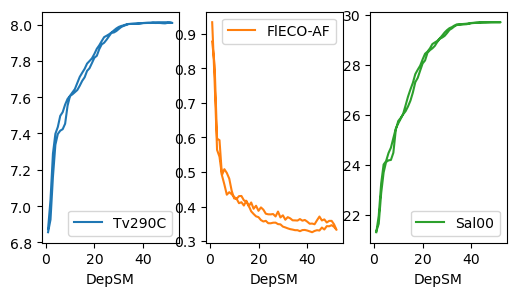

In [25]:
columns = ["Tv290C", "FlECO-AF","Sal00"]
testdata[columns].plot(subplots=True, layout=(1, 3), figsize=(6, 3), sharex=False)

In [5]:
# read ascii btl file
btlfle=os.path.join(SBEdir,'re9.btl')
testdata= pd.read_fwf(btlfle,header=None,skiprows=1,names=col_names)


In [9]:
outpath='re9_btl_data.txt'
with open(btlfle) as infile, open(outpath, 'w') as outfile:
    copy = False
    for line in infile:
        if 'Position' in line:
            copy = True
            continue
        elif copy:
            outfile.write(line)
testdata= pd.read_fwf(outpath,header=None,skiprows=0)
testdata

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,Mar 15 2023,29.6931,23.1088,1277,74.418866,50.252,8.0081,31.249734,0.3445,0.053368,282.622,(avg)
1,NaN,10:04:01,NaN,NaN,3,0.000008,0.116,0.0004,0.000450,0.0099,0.000047,0.077,(sdev)
2,NaN,NaN,NaN,NaN,1273,74.418854,50.086,8.0078,31.249082,0.3250,0.053308,282.501,(min)
3,NaN,NaN,NaN,NaN,1281,74.418877,50.436,8.0089,31.250407,0.3548,0.053448,282.720,(max)
4,2.0,Mar 15 2023,29.6669,23.0881,1433,74.419317,40.268,8.0079,31.220557,0.3288,0.053400,282.577,(avg)
5,NaN,10:04:40,NaN,NaN,3,0.000008,0.189,0.0001,0.002142,0.0072,0.000042,0.182,(sdev)
6,NaN,NaN,NaN,NaN,1429,74.419306,40.000,8.0077,31.217878,0.3111,0.053343,282.340,(min)
7,NaN,NaN,NaN,NaN,1437,74.419329,40.538,8.0080,31.223053,0.3349,0.053460,282.929,(max)
8,3.0,Mar 15 2023,29.4261,22.9017,1580,74.419742,30.317,7.9901,30.973060,0.3438,0.053376,285.087,(avg)
9,NaN,10:05:16,NaN,NaN,3,0.000008,0.187,0.0008,0.013192,0.0147,0.000045,0.142,(sdev)


In [ ]:
# sbe19plus data
def concat_ascii_data(ddir):
    fls=glob.glob(ddir)
    # concantenate the dat files
    for i,nme in enumerate(fls):
        data=pd.read_fwf(nme)
        if i==0:
            alldata=data
        else:
            alldata=pd.concat([alldata,data])

    alldata=alldata[['Sal00', 'DepSM','PrdM','Tv290C']]
    
    return alldata

concat_ascii_data(ddir)